In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.metrics import confusion_matrix #para matriz de confusion

In [5]:
path = r"training/messi/10.jpg"

In [6]:
img = image.load_img(path)

#La imagen se carga como un objeto de imagen Keras y se puede utilizar 
# posteriormente para realizar operaciones de procesamiento de imágenes

(263, 388, 3)

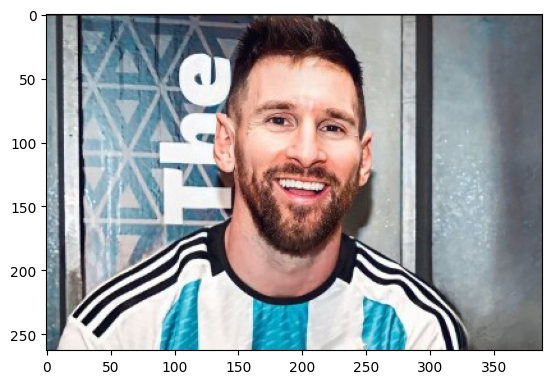

In [7]:
plt.imshow(img)
cv2.imread(path).shape

#mostramos la imagen seleccionada y su tamaño dimensional que ocupa

In [24]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

#Tenemos dos generadores de datos, uno por entrenamiento y otro por validacion, que 
# escalan los valores de píxeles de las imágenes al rango [0, 1] dividiendo por 255

In [25]:
train_dataset = train.flow_from_directory('training/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

#se crean los conjuntos de datos de flujo para el entrenamiento en base a generador de datos, 
# especificando la carpeta donde estan las imagenes

Found 385 images belonging to 2 classes.


In [10]:
validation_dataset = train.flow_from_directory('validation/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
#se crean los conjuntos de datos de flujo para la validacion en base al generador de datos, 
# especificando la carpeta donde estan las imagenes

Found 44 images belonging to 2 classes.


In [11]:
train_dataset.class_indices #para mapear los valores que puede tomar el resultado, si es messi o no
#se basa en las carpetas que tenemos

{'messi': 0, 'no_messi': 1}

In [12]:
train_dataset.classes #mapeando los valores de arriba en base a las carpetas que tenemos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
#modelo Red neuronal convolucional
# --> con 2 optimizadores distintos (ADAM y SGD)

model1_Adam = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='softmax')                                  
                                   ])

model1_SGD = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='softmax')                                  
                                   ])

#Contenido:
#capas de agrupación (maxpooling), 
#una capa de aplanamiento (flatten) y 
#dos capas densas (fully connected) con funciones de activación ReLU 
#una capa de salida 

In [14]:
#Los optimizadores, en el contexto de redes neuronales y aprendizaje automático, son algoritmos que se utilizan para ajustar 
# los pesos y los sesgos de un modelo de manera que minimicen una función de pérdida, lo que permite que el modelo se adapte 
# y aprenda a partir de los datos durante el proceso de entrenamiento.

model1_Adam.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),  # Utiliza Adam con la tasa de aprendizaje deseada
             metrics=['accuracy'])

model1_SGD.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.001, momentum=0.9),  # Utiliza SGD con la tasa de aprendizaje y momentum deseados
             metrics=['accuracy'])

#Se compila el modelo utilizando una función de pérdida de entropía cruzada binaria 

In [15]:
model_fit1_Adam = model1_Adam.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)

model_fit1_SGD = model1_SGD.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)

#El modelo se entrena utilizando los datos de entrenamiento establecidos anteriormente (train_dataset) durante 5 épocas (ciclos)

Epoch 1/5
129/129 [==============================] - 27s 201ms/step - loss: 0.5975 - accuracy: 0.1974 - val_loss: 0.7786 - val_accuracy: 0.5455
Epoch 2/5
129/129 [==============================] - 26s 199ms/step - loss: 0.4539 - accuracy: 0.1974 - val_loss: 0.9561 - val_accuracy: 0.5455
Epoch 3/5
129/129 [==============================] - 25s 197ms/step - loss: 0.3414 - accuracy: 0.1974 - val_loss: 0.9373 - val_accuracy: 0.5455
Epoch 4/5
129/129 [==============================] - 26s 199ms/step - loss: 0.2127 - accuracy: 0.1974 - val_loss: 1.1407 - val_accuracy: 0.5455
Epoch 5/5
129/129 [==============================] - 26s 198ms/step - loss: 0.1638 - accuracy: 0.1974 - val_loss: 1.4782 - val_accuracy: 0.5455
Epoch 1/5
129/129 [==============================] - 15s 116ms/step - loss: 0.5344 - accuracy: 0.1974 - val_loss: 0.9273 - val_accuracy: 0.5455
Epoch 2/5
129/129 [==============================] - 15s 116ms/step - loss: 0.5071 - accuracy: 0.1974 - val_loss: 0.7575 - val_accuracy:

In [16]:
#Modelo RNA multiperceptrón 
# --> con 2 optimizadores distintos (ADAM y SGD)

model2_Adam = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2_SGD = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# ------> Compilacion

model2_Adam.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),  # Utiliza Adam con la tasa de aprendizaje deseada
             metrics=['accuracy'])

model2_SGD.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.001, momentum=0.9),  # Utiliza SGD con la tasa de aprendizaje y momentum deseados
             metrics=['accuracy'])


#------->Training

model_fit2_Adam = model2_Adam.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)

model_fit2_SGD = model2_SGD.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)

#Contenido:
#1 capa de aplanamiento (flatten) y 
#3 capas densas (fully connected) con funciones de activación ReLU 
#1 Capa de salida FINAL (Dense): Se agrega una capa densa final con 10 neuronas y una función de activación softmax. 
#Esta capa se utiliza en problemas de clasificación multiclase, donde la red devuelve la probabilidad de pertenencia a 
#cada una de las 10 clases.

#la parte de compilacion y entrenamiento es parecido a lo anterior, se utilizaran solamente 5 epocas

Epoch 1/5
129/129 [==============================] - 71s 542ms/step - loss: 14.5950 - accuracy: 0.6779 - val_loss: 4.7294 - val_accuracy: 0.4545
Epoch 2/5
129/129 [==============================] - 69s 538ms/step - loss: 1.9884 - accuracy: 0.7169 - val_loss: 0.8736 - val_accuracy: 0.6364
Epoch 3/5
129/129 [==============================] - 69s 536ms/step - loss: 0.8198 - accuracy: 0.7636 - val_loss: 1.7379 - val_accuracy: 0.4545
Epoch 4/5
129/129 [==============================] - 69s 536ms/step - loss: 1.0759 - accuracy: 0.7221 - val_loss: 2.7825 - val_accuracy: 0.4545
Epoch 5/5
129/129 [==============================] - 68s 531ms/step - loss: 0.9664 - accuracy: 0.7558 - val_loss: 0.8471 - val_accuracy: 0.5682
Epoch 1/5
129/129 [==============================] - 32s 244ms/step - loss: 0.8592 - accuracy: 0.7091 - val_loss: 0.7792 - val_accuracy: 0.4545
Epoch 2/5
129/129 [==============================] - 31s 241ms/step - loss: 0.5883 - accuracy: 0.7870 - val_loss: 1.1646 - val_accuracy

In [17]:
#Modelo RNA multiperceptrón 2
# --> con 2 optimizadores distintos (ADAM y SGD)

model3_Adam = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(196, activation='relu'),
    tf.keras.layers.Dense(98, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3_SGD = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(392, activation='relu'),
    tf.keras.layers.Dense(196, activation='relu'),
    tf.keras.layers.Dense(98, activation='relu'),
    tf.keras.layers.Dense(49, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


#------->Training

model3_Adam.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),  # Utiliza Adam con la tasa de aprendizaje deseada
             metrics=['accuracy'])

model3_SGD.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.001, momentum=0.9),  # Utiliza SGD con la tasa de aprendizaje y momentum deseados
             metrics=['accuracy'])


#------->Training

model_fit3_Adam = model3_Adam.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)

model_fit3_SGD = model3_SGD.fit(train_dataset,
                     batch_size=128,
                     epochs=5,
                     validation_data = validation_dataset)


#Contenido:
#1 capa de aplanamiento (flatten) y 
#5 capas densas (fully connected) con funciones de activación ReLU 
#1 Capa de salida FINAL (Dense): Se agrega una capa densa final con 10 neuronas y una función de activación softmax. 
#Esta capa se utiliza en problemas de clasificación multiclase, donde la red devuelve la probabilidad de pertenencia a 
#cada una de las 10 clases.

#la parte de compilacion y entrenamiento es igual a lo anterior

Epoch 1/5
129/129 [==============================] - 107s 818ms/step - loss: 7.7427 - accuracy: 0.6779 - val_loss: 0.6368 - val_accuracy: 0.5909
Epoch 2/5
129/129 [==============================] - 104s 809ms/step - loss: 1.2366 - accuracy: 0.7013 - val_loss: 2.4011 - val_accuracy: 0.4545
Epoch 3/5
129/129 [==============================] - 105s 818ms/step - loss: 0.8174 - accuracy: 0.7403 - val_loss: 0.7699 - val_accuracy: 0.4545
Epoch 4/5
129/129 [==============================] - 105s 812ms/step - loss: 0.7426 - accuracy: 0.7455 - val_loss: 1.4506 - val_accuracy: 0.4545
Epoch 5/5
129/129 [==============================] - 105s 817ms/step - loss: 0.6523 - accuracy: 0.7870 - val_loss: 2.4447 - val_accuracy: 0.4545
Epoch 1/5
129/129 [==============================] - 49s 378ms/step - loss: 0.9730 - accuracy: 0.6649 - val_loss: 1.1981 - val_accuracy: 0.4545
Epoch 2/5
129/129 [==============================] - 47s 362ms/step - loss: 0.6136 - accuracy: 0.7870 - val_loss: 0.7639 - val_accu

In [18]:
#ahora avanzaremos para mostrar cada modelo con su respectiva perdida y acertacion con respecto a sus predicciones en training

plot_data = [[model_fit1_Adam,'RNA Convolucional Adam'], 
       [model_fit1_SGD, 'RNA Convolucional SGD'],
       [model_fit2_Adam, 'RNA multiperceptrón 1 Adam'],
       [model_fit2_SGD, 'RNA multiperceptrón 1 SGD'],
       [model_fit3_Adam, 'RNA multiperceptrón 2 Adam'],
       [model_fit3_SGD, 'RNA multiperceptrón 2 SGD']]

#Lista con sublistas con información sobre varios modelos de redes neuronales y sus respectivas etiquetas
#Esto lo usaremos despues para hacer una visualización de los resultados de entrenamiento de estos modelos

In [19]:
x = ['1','2','3','4','5']

#cantidad de epocas en las que se realiza la comparacion

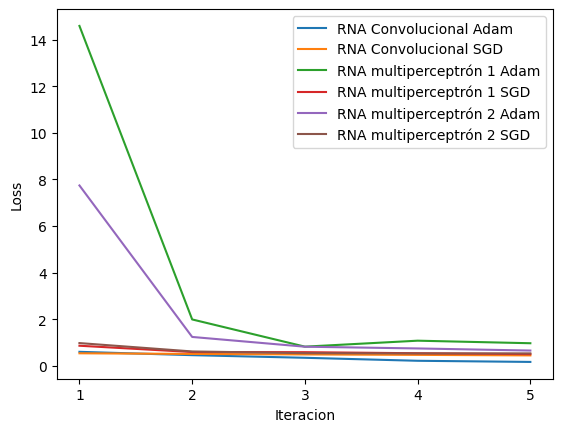

In [20]:
for data, label in plot_data:
  plt.plot(x, data.history['loss'], label = label)

plt.xlabel('Iteracion')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Aca vamos a armar un grafico donde vamos a ir comparando el nivel historico de LOSS por cada epoca en cada respectica RNA

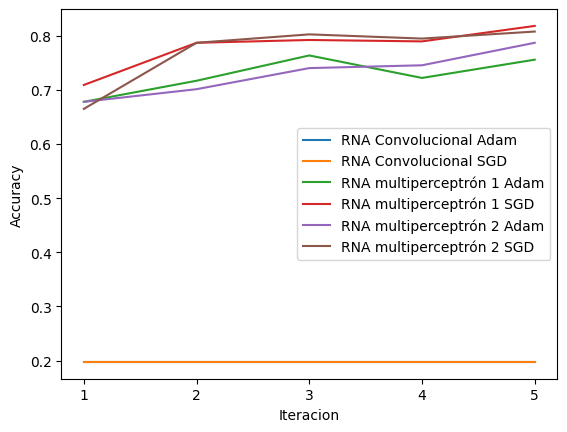

In [21]:
for data, label in plot_data:
  plt.plot(x, data.history['accuracy'], label = label)

plt.xlabel('Iteracion')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Esto se hace la misma comparacion de las 3 RNA en las 5 epocas establecidas, 
# graficando la precisión de los modelos durante el entrenamiento.

In [48]:
#luego de ver las estadisticas de prediccicon vamos a ver la MATRIZ DE CONFUSION.
#Donde tenemos todos los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos
#establecemos la ruta donde se encuentran las imagenes para empezar a realizar el testing
dir_path = r"testing/"

#traemos los datos de testing y ademas, a que clase pertenece
testing = ImageDataGenerator(rescale=1/255)

testing_dataset = testing.flow_from_directory("testing/",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode= None)

y_test = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1] 

# Realiza predicciones con cada MODELO
y_pred1_Adam = model1_Adam.predict(testing_dataset)
y_pred1_SGD = model1_SGD.predict(testing_dataset)

y_pred2_Adam = model2_Adam.predict(testing_dataset)
y_pred2_SGD = model2_SGD.predict(testing_dataset)

y_pred3_Adam = model3_Adam.predict(testing_dataset)
y_pred3_SGD = model3_SGD.predict(testing_dataset)


Found 79 images belonging to 1 classes.
27/27 [==============================] - 1s 29ms/step


In [ ]:
# Asumiendo que las predicciones son probabilidades y deseas convertirlas en etiquetas (0 o 1), 
# utilizamos un umbral para convertirlas en estos valores
umbral = 0.5
y_pred_labels1_Adam = (y_pred1_Adam > umbral).astype(int)
y_pred_labels1_SGD = (y_pred1_SGD > umbral).astype(int)

y_pred_labels2_Adam = (y_pred2_Adam > umbral).astype(int)
y_pred_labels2_SGD = (y_pred2_SGD > umbral).astype(int)

y_pred_labels3_Adam = (y_pred3_Adam > umbral).astype(int)
y_pred_labels3_SGD = (y_pred3_SGD > umbral).astype(int)

# Calcula la matriz de confusión por cada modelo
confusion1 = confusion_matrix(y_test, y_pred_labels1_Adam)
print("Matriz de Confusión - RNA Convolucional 1 Adam:")
print(confusion1)

confusion2 = confusion_matrix(y_test, y_pred_labels1_SGD)
print("Matriz de Confusión - RNA Convolucional 1 SGD:")
print(confusion2)

confusion3 = confusion_matrix(y_test, y_pred_labels2_Adam)
print("Matriz de Confusión - RNA Multiperceptron 1 Adam:")
print(confusion3)

confusion4 = confusion_matrix(y_test, y_pred_labels2_SGD)
print("Matriz de Confusión - RNA Multiperceptron 1 SGD:")
print(confusion4)

confusion5 = confusion_matrix(y_test, y_pred_labels3_Adam)
print("Matriz de Confusión - RNA Multiperceptron 2 Adam:")
print(confusion5)

confusion6 = confusion_matrix(y_test, y_pred_labels3_SGD)
print("Matriz de Confusión - RNA Multiperceptron 2 SGD:")
print(confusion6)

In [ ]:
#TODO: verdaderos positivos, verdaderos negativo, falsos positivos, falsos negativos de la matriz

In [ ]:
#Luego de todo el analisis, mostramos los resultados realizando pruebas con cada una de las imagenes de training, por cada modelo
def funct mostrarPrediccionConImagen(model):
    for i in os.listdir(dCir_path):
        img= image.load_img(dir_path+'//'+ i,target_size=(200,200))
        plt.imshow(img)
        plt.show()
        
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        images = np.vstack([X])
        
        probabilidad = model.predict(images)[0][0]
    
        
        if probabilidad == 0:
            print("es messi")
        else:
            print("no es messi")


In [ ]:
mostrarPrediccionConImagen(model1_Adam)

In [ ]:
mostrarPrediccionConImagen(model1_SGD)

In [ ]:
mostrarPrediccionConImagen(model2_Adam)

In [ ]:
mostrarPrediccionConImagen(model2_SGD)

In [ ]:
mostrarPrediccionConImagen(model3_Adam)

In [ ]:
mostrarPrediccionConImagen(model3_SGD)